In [50]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time
from pandas import ExcelWriter
from pandas import ExcelFile
from pprint import pprint
from scipy.stats import linregress
from datetime import timedelta

In [51]:
fileordprod = "./data/brazilian-ecommerce/olist_order_items_dataset.csv"
fileordcusttime = "./data/brazilian-ecommerce/olist_orders_dataset.csv"
fileprodcat = "./data/brazilian-ecommerce/olist_products_dataset.csv"
fileprodtransl = "./data/brazilian-ecommerce/product_category_name_translation.csv"
filecustzip = "./data/brazilian-ecommerce/olist_customers_dataset.csv"
filezipcoord = "./data/brazilian-ecommerce/olist_geolocation_dataset.csv"

# Read Purchasing File and store into Pandas data frame
ordprod = pd.read_csv(fileordprod)#[['order_id', 'product_id', 'price']]
ordcusttime= pd.read_csv(fileordcusttime)#[['order_id', 'customer_id', 'order_purchase_timestamp']]
prodcat = pd.read_csv(fileprodcat)#[['product_id', 'product_category_name']]
prodtransl = pd.read_csv(fileprodtransl)
custzip = pd.read_csv(filecustzip)[['customer_id','customer_zip_code_prefix']]
zipcoord = pd.read_csv(filezipcoord)[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]

zipcoord = zipcoord.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix'}).drop_duplicates(subset = 'customer_zip_code_prefix')




mergedf = pd.merge(ordcusttime, ordprod, on = 'order_id',how= 'left')
mergedf = pd.merge(mergedf, prodcat, on = 'product_id', how = 'left')
mergedf = pd.merge(mergedf, prodtransl, on = 'product_category_name', how = 'left')
mergedf = pd.merge(mergedf, custzip, on = 'customer_id', how = 'left')
mergedf = pd.merge(mergedf, zipcoord, on = 'customer_zip_code_prefix' , how = 'left')

renamecolumns = {
    'order_purchase_timestamp': 'order_time',
    'product_category_name_english': 'category'
}
mergedf = mergedf.rename(columns = renamecolumns)

#minus one day
mergedf["date_time"]= pd.to_datetime(mergedf['order_time']) - timedelta(days=1)

mergedf['city'] = ''
mergedf['citylon'] = ''
mergedf['citylat'] = ''

#converted to MM/YY Format
mergedf['YYYY'] = pd.DatetimeIndex(mergedf['date_time']).year
mergedf['MM'] = pd.DatetimeIndex(mergedf['date_time']).month

mergedf['month'] = pd.to_datetime(mergedf['date_time'])
mergedf['day'] = mergedf['month'].dt.strftime('%m/%d/%y')
mergedf['month'] = mergedf['month'].dt.strftime('%m/%y')

#Rid of black friday
mergedf = mergedf.loc[mergedf['day'] != '11/23/17']

print(mergedf.shape)
mergedf

(112049, 34)


,order_id,customer_id,order_status,order_time,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,geolocation_lat,geolocation_lng,date_time,city,citylon,citylat,YYYY,MM,month,day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,-23.574809,-46.587471,2017-10-01 10:56:33,,,,2017,10,10/17,10/01/17
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,-12.169860,-44.988369,2018-07-23 20:41:37,,,,2018,7,07/18,07/23/18
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,-16.746337,-48.514624,2018-08-07 08:38:49,,,,2018,8,08/18,08/07/18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,-5.767733,-35.275467,2017-11-17 19:28:06,,,,2017,11,11/17,11/17/17
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,-23.675037,-46.524784,2018-02-12 21:18:39,,,,2018,2,02/18,02/12/18
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,1.0,060cb19345d90064d1015407193c233d,...,-23.548581,-50.550660,2017-07-08 21:57:05,,,,2017,7,07/17,07/08/17
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,1.0,a1804276d9941ac0733cfd409f5206eb,...,-27.855758,-54.447381,2017-04-10 12:22:08,,,,2017,4,04/17,04/10/17
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1.0,4520766ec412348b8d4caa5e8a18c464,...,-22.800936,-43.424861,2017-05-15 13:10:30,,,,2017,5,05/17,05/15/17
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,1.0,ac1789e492dcd698c5c10b97a671243a,...,-27.420763,-52.674188,2017-01-22 18:29:09,,,,2017,1,01/17,01/22/17
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,1.0,9a78fb9862b10749a117f7fc3c31f051,...,-23.478754,-47.467931,2017-07-28 11:55:02,,,,2017,7,07/17,07/28/17


In [52]:
# weatherurl = 'http://api.openweathermap.org/data/2.5/weather?'
# weatherapikey = 'b457821be7196c46ce037583b6f2feb4'
# for index, row in mergedf.iterrows():
#     latitude = mergedf.loc[mergedf.index[index],'geolocation_lat']
#     longitude = mergedf.loc[mergedf.index[index],'geolocation_lng']
    
#     params = {
#     'lon': longitude,
#     'lat': latitude,
#     'appid': weatherapikey
#     }
    
#     cityresponse = requests.get(weatherurl, params = params).json()
    
#     mergedf.loc[index, 'city'] = cityresponse['name']
    
#     if index % 500 == 0:
#         print(index, 'city')

# weatherurl = 'http://api.openweathermap.org/data/2.5/weather?'
# weatherapikey = 'b457821be7196c46ce037583b6f2feb4'
# for index, row in mergedf.iterrows():
#     city = mergedf.loc[mergedf.index[index],'city']
    
#     params = {
#     'q': city,
#     'appid': weatherapikey
#     }
    
#     cityresponse = requests.get(weatherurl, params = params).json()
#     mergedf.loc[index, 'citylon'] = cityresponse['coord']['lon']
#     mergedf.loc[index, 'citylat'] = cityresponse['coord']['lat']
#     if index % 500 == 0:
#         print(index, 'citylon & citylat')
    
# mergedf.to_csv('MergeDF.csv')


In [53]:
lngbin = np.arange(min(mergedf['geolocation_lng']), max(mergedf['geolocation_lng']), 1)
latbin = np.arange(min(mergedf['geolocation_lat']), max(mergedf['geolocation_lat']), 1)

lngbinlabel = []
latbinlabel = []

for lng in range(0, len(lngbin) - 1):
    lngbinlabel.append(lngbin[lng] + (lngbin[lng+1] - lngbin[lng])/2)
        
for lat in range(0, len(latbin) - 1):
    latbinlabel.append(latbin[lat] + (latbin[lat+1] - latbin[lat])/2)

mergedf['lngbin'] = pd.cut(mergedf['geolocation_lng'], lngbin, labels=lngbinlabel)
mergedf['latbin'] = pd.cut(mergedf['geolocation_lat'], latbin, labels=latbinlabel)
mergedf.head()

,order_id,customer_id,order_status,order_time,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,date_time,city,citylon,citylat,YYYY,MM,month,day,lngbin,latbin
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2017-10-01 10:56:33,,,,2017,10,10/17,10/01/17,-46.166706,-23.105374
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,2018-07-23 20:41:37,,,,2018,7,07/18,07/23/18,-45.166706,-12.105374
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,2018-08-07 08:38:49,,,,2018,8,08/18,08/07/18,-48.166706,-17.105374
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,2017-11-17 19:28:06,,,,2017,11,11/17,11/17/17,-35.166706,-6.105374
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,2018-02-12 21:18:39,,,,2018,2,02/18,02/12/18,-46.166706,-24.105374


In [54]:
urlBOV = "https://www.quandl.com/api/v3/datasets/BCB/7.json?api_key=2vRuu5GNchksqBdcAHzc"
responseBOV = requests.get(urlBOV).json()


In [124]:
days = 10

BOV_df = pd.DataFrame(responseBOV['dataset']['data'])

BOV_df = BOV_df.rename(index=str, columns={0: "day", 1: "BOV"})

BOV_df['day'] = pd.to_datetime(BOV_df['day'])
BOV_df['day'] = BOV_df['day'].dt.strftime('%m/%d/%y')
BOV_df['BOV'] = pd.to_numeric(BOV_df['BOV'])
BOV_df = BOV_df.sort_values(by = 'day', ascending = True)
BOV_df['BOVdiff'] = BOV_df['BOV'].diff(periods = days)
BOV_df['BOVma'] = BOV_df['BOV'].rolling(window = days).mean()
BOV_df.head(20)

metriclist = ['BOV']#, 'BOVdiff', 'BOVma']
mergedf = pd.merge(mergedf, BOV_df, on = 'day', how = 'left')
mergedf.head()

,order_id,customer_id,order_status,order_time,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,month,day,lngbin,latbin,BOV_x,BOVdiff_x,BOVma_x,BOV_y,BOVdiff_y,BOVma_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,10/17,10/01/17,-46.166706,-23.105374,NaN,NaN,NaN,NaN,NaN,NaN
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,07/18,07/23/18,-45.166706,-12.105374,77996.0,64198.0,54669.1,77996.0,64198.0,54669.1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,08/18,08/07/18,-48.166706,-17.105374,80346.0,67018.0,56306.8,80346.0,67018.0,56306.8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,11/17,11/17/17,-35.166706,-6.105374,73437.0,49268.0,53364.5,73437.0,49268.0,53364.5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,02/18,02/12/18,-46.166706,-24.105374,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# mergedf['day'] = pd.to_datetime(mergedf['day']) - 1


In [57]:
#mergedf['category'].unique()

In [58]:
new_categories = {'fashion_clothing': ['perfumery', 'luggage_accessories','watches_gifts','fashion_underwear_beach','fashion_bags_accessories','fashion_shoes','fashion_male_clothing','fashion_sport','fashio_female_clothing','fashion_childrens_clothes'],
                  'home_furniture': ['housewares','art','arts_and_craftmanship','furniture_decor','office_furniture','bed_bath_table','home_confort','furniture_bedroom','kitchen_dining_laundry_garden_furniture','home_comfort_2','furniture_mattress_and_upholstery'],
                  'construction_tools': ['garden_tools','construction_tools_construction','construction_tools_lights','construction_tools_garden','construction_tools_safety','home_construction','construction_tools_tools'],
                  'electronics': ['computers_accessories','telephony','electionics','cds_dvds_musicals','consoles_games','audio','tablets_printing_image','computers','dvds_blu_ray','music'],
                  'food_drink': ['food','drinks','food_drink','la_cuisine'],
                  'books': ['books_general_interest','books_imported','books_technical'],
                  'appliances': ['air_conditioning','small_appliances','home_appliances','home_appliances_2','small_appliances_home_oven_and_coffee'],
                  'auto': ['auto'],
                  'industry':['agro_industry_and_commerce','industry_commerce_and_business'],
                  'other':['pet_shop','stationary','toys','baby','cool_stuff','sports_leisure','diapers_and_hygeine','signaling_and_security','party_supplies','cine_photo','market_place','musical_instruments','christmas_supplies']}
                    
new_dict = {}
for key,valuelist in new_categories.items():
    for v in valuelist:
        new_dict[v] = key

mergedf['category'] = mergedf.category.replace(new_dict)

In [59]:
#commented out because it lags when rerunning all 

#save to excel file 

# writer = ExcelWriter('output.xlsx')
# mergedf.to_excel(writer,'Sheet1',index=False)
# writer.save()

In [60]:
home_furniture = mergedf['price'][mergedf['category']=='home_furniture'].sum()
fashion_clothing = mergedf['price'][mergedf['category']=='fashion_clothing'].sum()
construction_tools = mergedf['price'][mergedf['category']=='construction_tools'].sum()
electronics = mergedf['price'][mergedf['category']=='electronics'].sum()
food_drink = mergedf['price'][mergedf['category']=='food_drink'].sum()
books = mergedf['price'][mergedf['category']=='books'].sum()
appliances = mergedf['price'][mergedf['category']=='appliances'].sum()

auto = mergedf['price'][mergedf['category']=='auto'].sum()
industry = mergedf['price'][mergedf['category']=='industry'].sum()
other = mergedf['price'][mergedf['category']=='other'].sum()
#data['duration'][data['item'] == 'call'].sum()

total_spend = home_furniture + fashion_clothing + construction_tools + electronics + food_drink + books + appliances + auto + industry + other

category_spend = {home_furniture:'home_furniture',
                        fashion_clothing:'fashion_clothing',
                        construction_tools:'construction_tools',
                        electronics:'electronics',
                        food_drink:'food_drink',
                        books:'books',
                        appliances:'appliances',
                        auto:'auto',
                        appliances:'industry',
                        other:'other'
                       }

In [61]:
mergedf['category'].nunique()

19

In [62]:
print(category_spend)

{2792854.04: 'home_furniture', 1918814.5300000003: 'fashion_clothing', 786502.8: 'construction_tools', 1828075.78: 'electronics', 68634.43000000001: 'food_drink', 70088.3: 'books', 483217.63: 'industry', 587925.94: 'auto', 2965078.2: 'other'}


In [63]:
print(total_spend)

11607060.129999999


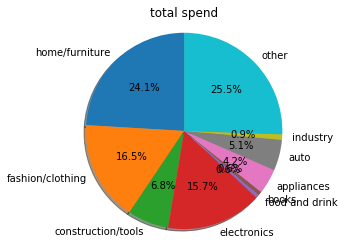

In [64]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'home/furniture', 'fashion/clothing', 'construction/tools', 'electronics','food and drink','books','appliances', 'auto', 'industry', 'other'
sizes = [home_furniture, fashion_clothing, construction_tools, electronics, food_drink, books, appliances, auto, industry, other]
explode = (0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('total spend')
plt.show()

In [65]:
groupdf = mergedf.groupby(['BOVdiff', 'category'])
groupdf = groupdf.sum()
groupdf.head()

order_item_id  price  freight_value  \
BOVdiff category                                                
35625.0 fashion_clothing            1.0   10.9           8.72   
38089.0 fashion_clothing            1.0  149.0          15.21   
        health_beauty               1.0  370.0          19.43   
        home_furniture              1.0   34.9          12.93   
        other                       3.0  798.0          48.52   

                          product_name_lenght  product_description_lenght  \
BOVdiff category                                                            
35625.0 fashion_clothing                 64.0                      1710.0   
38089.0 fashion_clothing                 42.0                       748.0   
        health_beauty                    48.0                       657.0   
        home_furniture                   60.0                       448.0   
        other                            88.0                       844.0   

                          product_photos_qty  product_weight_g  \
BOVdiff category                                                 
35625.0 fashion_clothing                 1.0             200.0   
38089.0 fashion_clothing                 2.0             300.0   
        health_beauty                    1.0             750.0   
        home_furniture                   5.0           16300.0   
        other                            8.0            6576.0   

                          product_length_cm  product_height_cm  \
BOVdiff category                                                 
35625.0 fashion_clothing               16.0                2.0   
38089.0 fashion_clothing               16.0               13.0   
        health_beauty                  38.0               12.0   
        home_furniture                 30.0               30.0   
        other                          50.0               90.0   

                          product_width_cm  customer_zip_code_prefix  \
BOVdiff category                                                       
35625.0 fashion_clothing              11.0                     80030   
38089.0 fashion_clothing              13.0                     28375   
        health_beauty                 25.0                     36305   
        home_furniture                30.0                      8142   
        other                         50.0                    171080   

                          geolocation_lat  geolocation_lng  YYYY  MM  \
BOVdiff category                                                       
35625.0 fashion_clothing       -25.414205       -49.259493  2016  12   
38089.0 fashion_clothing       -20.927197       -41.869293  2017   1   
        health_beauty          -21.124485       -44.237642  2017   1   
        home_furniture         -23.524554       -46.389812  2017   1   
        other                  -51.885033      -104.336129  4034   2   

                               BOV     BOVma  
BOVdiff category                              
35625.0 fashion_clothing   57255.0   48428.7  
38089.0 fashion_clothing   61665.0   50447.1  
        health_beauty      61665.0   50447.1  
        home_furniture     61665.0   50447.1  
        other             123330.0  100894.2

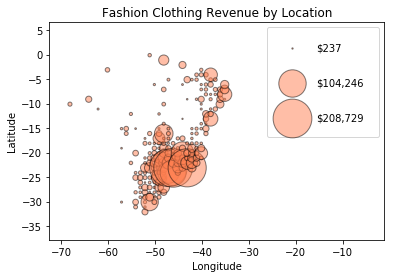

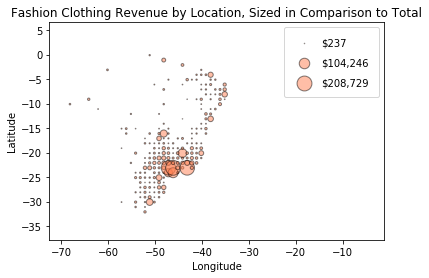

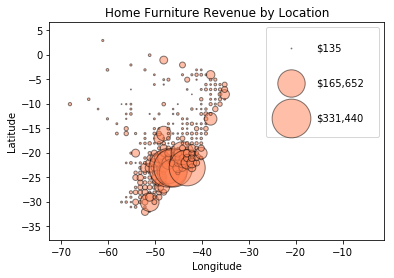

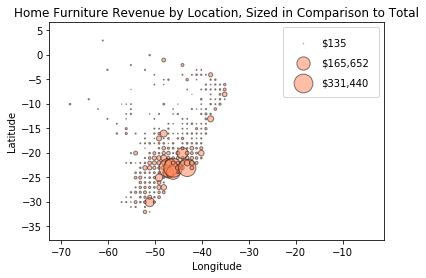

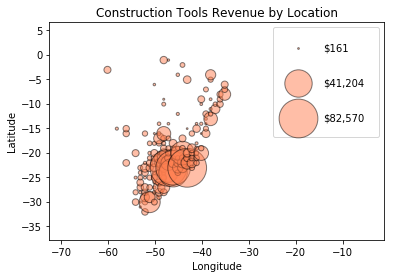

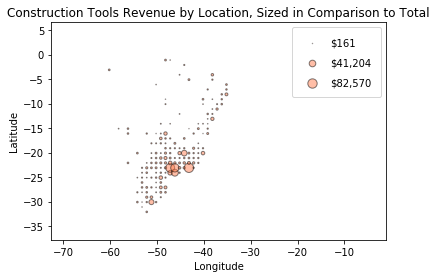

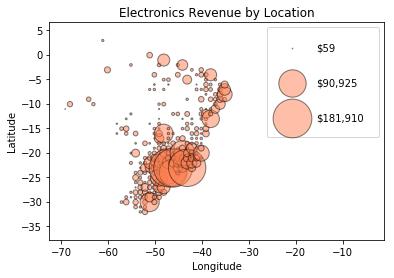

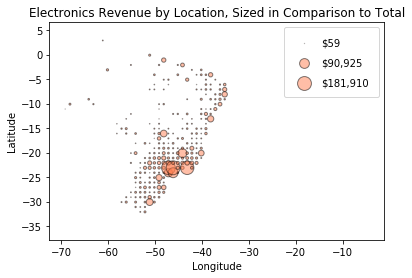

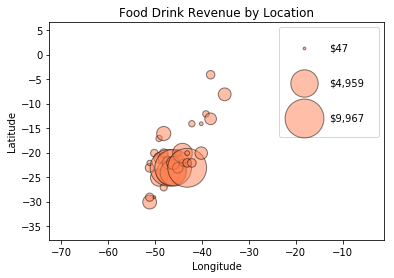

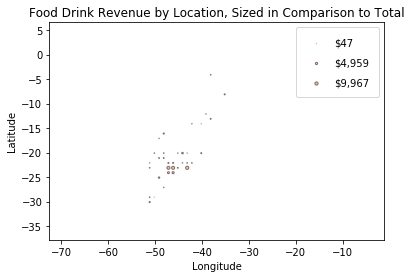

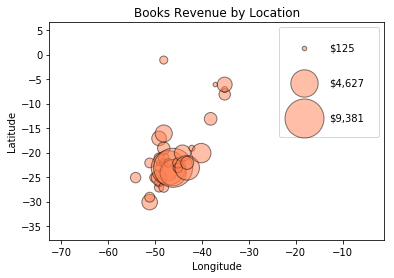

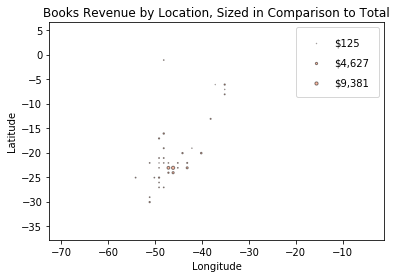

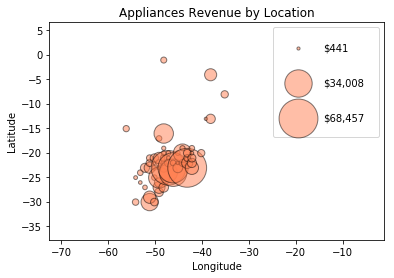

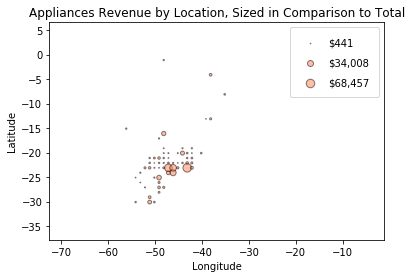

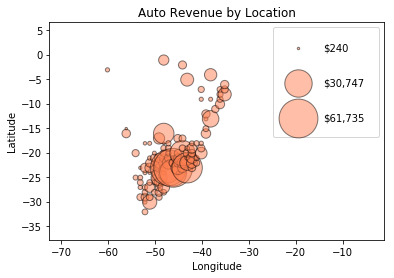

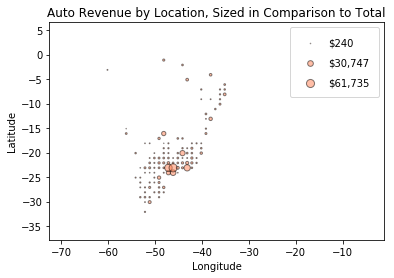

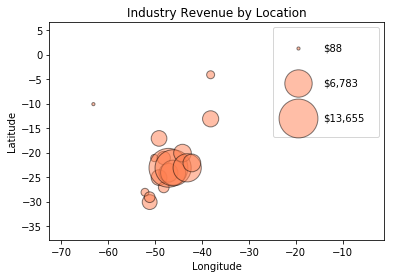

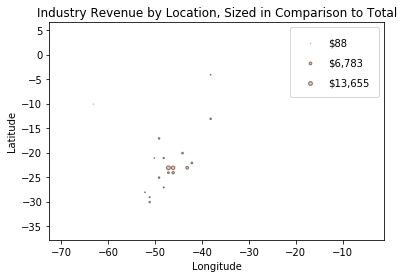

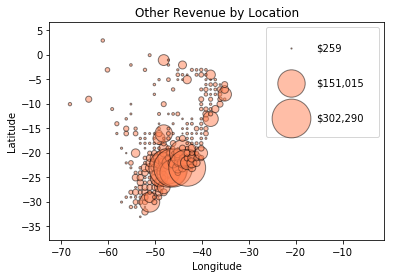

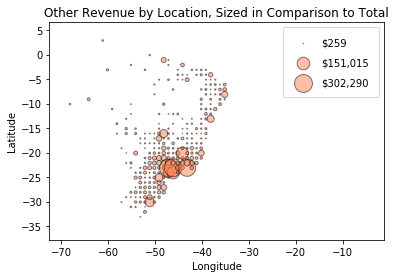

         lngbin    latbin category  order_item_id     price  freight_value  \
1663 -35.166706 -6.105374    other           74.0   7235.14        1678.06   
1645 -35.166706 -8.105374    other          272.0  36889.18        8107.31   
1635 -35.166706 -9.105374    other            7.0   1347.44         253.17   
1654 -35.166706 -7.105374    other           74.0  12117.40        2366.84   
1630 -36.166706 -6.105374    other            7.0    611.51         283.07   

      product_name_lenght  product_description_lenght  product_photos_qty  \
1663               2808.0                     52715.0               136.0   
1645              11778.0                    238022.0               593.0   
1635                331.0                      9626.0                14.0   
1654               3155.0                     69580.0               161.0   
1630                355.0                      8545.0                17.0   

      product_weight_g    ...      product_height_cm  product_width_

In [66]:
groupdf = mergedf.groupby(['lngbin', 'latbin'])
groupdf = groupdf.sum()
groupdf = groupdf.loc[groupdf['price'].isnull() == False]
groupdf = groupdf.loc[groupdf['order_item_id'] > 2]
groupdf = groupdf.reset_index()

minlng = min(groupdf['lngbin'])
maxlng = max(groupdf['lngbin'])
minlat = min(groupdf['latbin'])
maxlat = max(groupdf['latbin'])
marginlng = (max(groupdf['lngbin'])-min(groupdf['lngbin']))/10
marginlat = (max(groupdf['latbin'])-min(groupdf['latbin']))/10
dividebytotal = (max(groupdf['price']) - min(groupdf['price']))/1500

for cat in new_categories.keys():
    
    ###COMPARED TO SELF###
    groupdf = mergedf.groupby(['lngbin', 'latbin', 'category'])
    groupdf = groupdf.sum()
    groupdf = groupdf.loc[groupdf['price'].isnull() == False]
    groupdf = groupdf.loc[groupdf['order_item_id'] > 5]
    groupdf = groupdf.reset_index()
    
    groupdf = groupdf.loc[groupdf['category'] == cat]
    
    dividebyeach = (max(groupdf['price']) - min(groupdf['price']))/1500
    plt.scatter(groupdf['lngbin'], groupdf['latbin'], color="coral", edgecolor="black", alpha = 0.5,marker="o", s=groupdf['price']/dividebyeach)
    plt.xlim(minlng - marginlng, maxlng + 10 * marginlng)
    plt.ylim(minlat - marginlat, maxlat  + 1 * marginlat)
    
    #LEGEND
    marker1 = plt.scatter([],[], s=groupdf['price'].min()/dividebyeach)
    marker2 = plt.scatter([],[], s=(groupdf['price'].max() - groupdf['price'].min())/2/dividebyeach)
    marker3 = plt.scatter([],[], s=groupdf['price'].max()/dividebyeach)
    legend_markers = [marker1, marker2, marker3]
    labels = [
        '$' + str("{:,}".format(int(groupdf['price'].min()))),
        '$' + str("{:,}".format(int((groupdf['price'].max() - groupdf['price'].min())/2))),
        '$' + str("{:,}".format(int(groupdf['price'].max())))
        ]
    leg = plt.legend(handles=legend_markers, labels=labels, loc='upper right',
        scatterpoints=1, labelspacing = 2.5, borderpad = 1.5, handletextpad = 1.5)
    LH = leg.legendHandles
    LH[0].set_color('coral')
    LH[1].set_color('coral')
    LH[0].set_alpha(0.5)
    LH[1].set_alpha(0.5)
    LH[0].set_edgecolor('black')
    LH[1].set_edgecolor('black')
    LH[2].set_color('coral')
    LH[2].set_alpha(0.5)
    LH[2].set_edgecolor('black')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'{cat.replace("_", " ").title()} Revenue by Location')
    #plt.savefig(f'./Graphs/{cat.replace("_", " ").title()} Revenue by Location.png')
    plt.show()
    
    ###COMPARED TO TOTAL###
    
    plt.scatter(groupdf['lngbin'], groupdf['latbin'], color="coral", edgecolor="black", alpha = 0.5,marker="o", s=groupdf['price']/dividebytotal)
    plt.xlim(minlng - marginlng, maxlng + 10 * marginlng)
    plt.ylim(minlat - marginlat, maxlat  + 1 * marginlat)
    
    #LEGEND
    marker1 = plt.scatter([],[], s=groupdf['price'].min()/dividebytotal)
    marker2 = plt.scatter([],[], s=(groupdf['price'].max() - groupdf['price'].min())/2/dividebytotal)
    marker3 = plt.scatter([],[], s=groupdf['price'].max()/dividebytotal)
    legend_markers = [marker1, marker2, marker3]
    labels = [
        '$' + str("{:,}".format(int(groupdf['price'].min()))),
        '$' + str("{:,}".format(int((groupdf['price'].max() - groupdf['price'].min())/2))),
        '$' + str("{:,}".format(int(groupdf['price'].max())))
        ]
    leg = plt.legend(handles=legend_markers, labels=labels, loc='upper right',
        scatterpoints=1, labelspacing = 1, borderpad = 1)
    LH = leg.legendHandles
    LH[0].set_color('coral')
    LH[1].set_color('coral')
    LH[0].set_alpha(0.5)
    LH[1].set_alpha(0.5)
    LH[0].set_edgecolor('black')
    LH[1].set_edgecolor('black')
    LH[2].set_color('coral')
    LH[2].set_alpha(0.5)
    LH[2].set_edgecolor('black')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'{cat.replace("_", " ").title()} Revenue by Location, Sized in Comparison to Total')
    plt.savefig(f'./Graphs/{cat.replace("_", " ").title()} Revenue by Location, Sized in Comparison to Total.png')
    
    plt.show()
    

print(groupdf.sort_values(by = ['lngbin'], ascending = False).head())

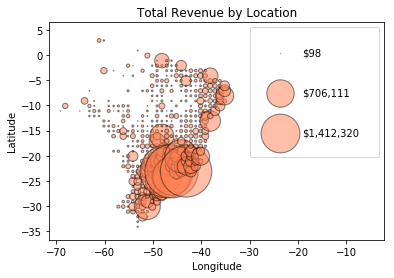

In [67]:
###TOTAL###

minlng = min(groupdf['lngbin'])
maxlng = max(groupdf['lngbin'])
minlat = min(groupdf['latbin'])
maxlat = max(groupdf['latbin'])
marginlng = (max(groupdf['lngbin'])-min(groupdf['lngbin']))/10
marginlat = (max(groupdf['latbin'])-min(groupdf['latbin']))/10


groupdf = mergedf.groupby(['lngbin', 'latbin'])
groupdf = groupdf.sum()
groupdf = groupdf.loc[groupdf['price'].isnull() == False]
groupdf = groupdf.loc[groupdf['order_item_id'] > 2]
groupdf = groupdf.reset_index()


plt.scatter(groupdf['lngbin'], groupdf['latbin'], color="coral", edgecolor="black", alpha = 0.5,marker="o", s=groupdf['price']/500)
plt.xlim(minlng - marginlng, maxlng + 10 * marginlng)
plt.ylim(minlat - marginlat, maxlat  + 1 * marginlat)

marker1 = plt.scatter([],[], s=groupdf['price'].min()/dividebytotal)
marker2 = plt.scatter([],[], s=(groupdf['price'].max() - groupdf['price'].min())/2/dividebytotal)
marker3 = plt.scatter([],[], s=groupdf['price'].max()/dividebytotal)
legend_markers = [marker1, marker2, marker3]
labels = [
    '$' + str("{:,}".format(int(groupdf['price'].min()))),
    '$' + str("{:,}".format(int((groupdf['price'].max() - groupdf['price'].min())/2))),
    '$' + str("{:,}".format(int(groupdf['price'].max())))
    ]
leg = plt.legend(handles=legend_markers, labels=labels, loc='upper right',
    scatterpoints=1, labelspacing = 3, borderpad = 2, handletextpad = 1.25)
LH = leg.legendHandles
LH[0].set_color('coral')
LH[1].set_color('coral')
LH[0].set_alpha(0.5)
LH[1].set_alpha(0.5)
LH[0].set_edgecolor('black')
LH[1].set_edgecolor('black')
LH[2].set_color('coral')
LH[2].set_alpha(0.5)
LH[2].set_edgecolor('black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Total Revenue by Location')
plt.savefig('./Graphs/Total Revenue by Location.png')

plt.show()

#print(groupdf.sort_values(by = ['latbin'], ascending = False).head())

R2 = 0.28
Revenue = 0.12 * (BOVESPA Index) + (-5916.12)


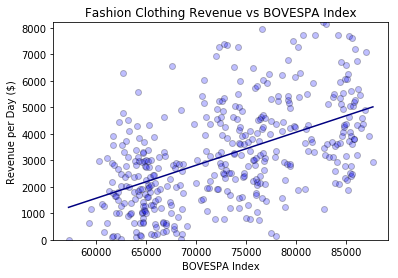

R2 = 0.38
Revenue = 0.18 * (BOVESPA Index) + (-8715.16)


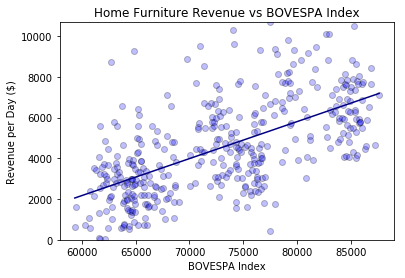

R2 = 0.24
Revenue = 0.05 * (BOVESPA Index) + (-2676.33)


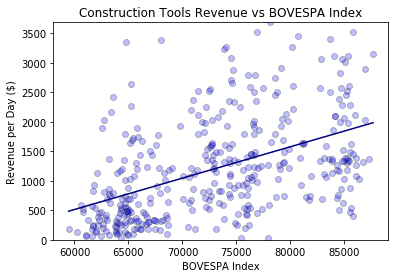

R2 = 0.32
Revenue = 0.14 * (BOVESPA Index) + (-7335.77)


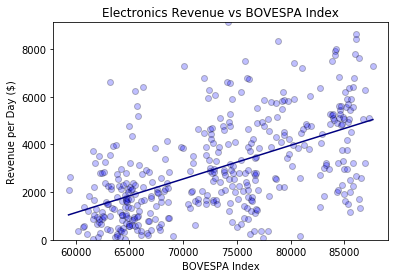

R2 = 0.07
Revenue = 0.0 * (BOVESPA Index) + (-167.18)


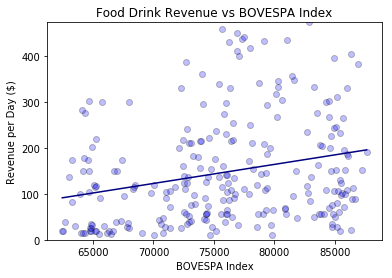

R2 = 0.01
Revenue = 0.0 * (BOVESPA Index) + (43.18)


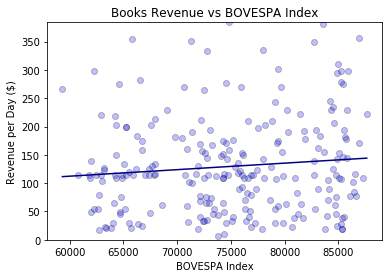

R2 = 0.15
Revenue = 0.03 * (BOVESPA Index) + (-1596.31)


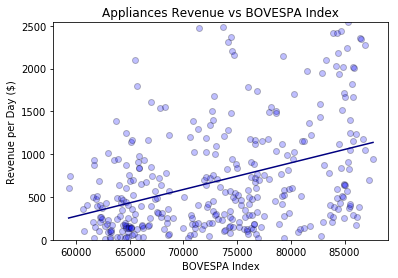

R2 = 0.22
Revenue = 0.04 * (BOVESPA Index) + (-2182.09)


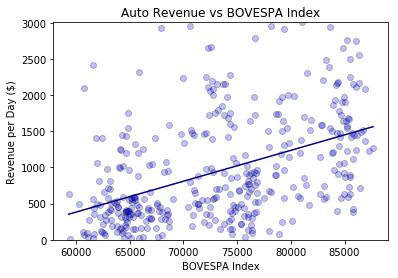

R2 = 0.01
Revenue = 0.01 * (BOVESPA Index) + (-58.64)


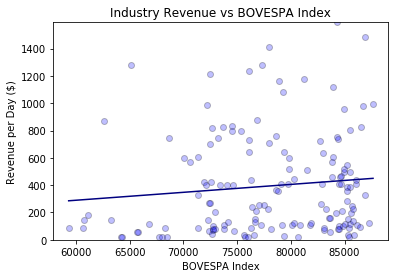

R2 = 0.32
Revenue = 0.17 * (BOVESPA Index) + (-8001.37)


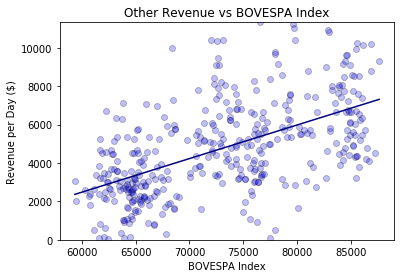

In [68]:
#BY CATEGORIES
for metric in metriclist:
    for cat in new_categories.keys():
        groupdf = mergedf.groupby([metric, 'category'])
        groupdf = groupdf.sum()
        groupdf.reset_index(inplace = True)

        groupdf = groupdf.loc[groupdf['price'] > 1]
        groupdf = groupdf.loc[groupdf['category'] == cat]
        
        Q1 = np.percentile(groupdf['price'], 25)
        Q3 = np.percentile(groupdf['price'], 75)
        IQR = Q3 - Q1
        UpperBound = Q3 + 1.5 * IQR
        LowerBound = Q1 - 1.5 * IQR
        
        groupdf = groupdf.loc[groupdf['price'] < UpperBound]
        groupdf = groupdf.loc[groupdf['price'] > LowerBound]


        plt.scatter(groupdf[metric], groupdf['price'], color="blue", edgecolor="black", alpha = 0.25,marker="o")
        
        plt.ylim(0, max(groupdf['price']))
        (slopeBOV, interceptBOV, rBOV, _, _) = linregress(groupdf[metric], groupdf['price'])
        fitBOV = slopeBOV * groupdf[metric] + interceptBOV
        
        plt.ylabel('Revenue per Day ($)')
        plt.xlabel('BOVESPA Index')
        plt.title(f'{cat.replace("_", " ").title()} Revenue vs BOVESPA Index')
        plt.plot(groupdf[metric], fitBOV, color = 'navy')
        print(f'R2 = {round(rBOV**2,2)}')
        print(f'Revenue = {round(slopeBOV, 2)} * (BOVESPA Index) + ({round(interceptBOV,2)})')
        plt.savefig(f'./Graphs/{metric}{cat}.png')
        plt.show()

R2 = 0.51
Revenue = 1.01 * (BOVESPA Index) + (-51588.97)


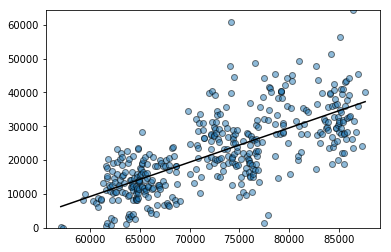

In [69]:
#ALL CATEGORIES
for metric in metriclist:
    groupdf = mergedf.groupby(metric)
    groupdf = groupdf.sum()
    groupdf.reset_index(inplace = True)
    #why are there sum of prices at 0? no data from those dates?
    groupdf = groupdf.loc[groupdf['price'] > 1]


    plt.scatter(groupdf[metric], groupdf['price'], alpha = 0.5, edgecolor = 'black')
    plt.ylim(0, max(groupdf['price']))
    (slopeBOV, interceptBOV, rBOV, _, _) = linregress(groupdf[metric], groupdf['price'])

    fitBOV = slopeBOV * groupdf[metric] + interceptBOV
    
    plt.plot(groupdf[metric], fitBOV, color = 'black')
    
    print(f'R2 = {round(rBOV**2,2)}')
    print(f'Revenue = {round(slopeBOV, 2)} * (BOVESPA Index) + ({round(interceptBOV,2)})')
    plt.savefig(f'TotalRevenueVsBOV.png')
    plt.show()
    

In [70]:
#used to see what the outlier point was
#groupdf.sort_values('price', ascending= False).head()

In [163]:
newgroup2 = mergedf.groupby(['month'])['BOV_x'].mean()
newgroup2 = newgroup2[['01/17','02/17','03/17','04/17','05/17','06/17','07/17','08/17','09/17','10/17','11/17','12/17','01/18','02/18','03/18','04/18','05/18','06/18','07/18','08/18','09/18']]
newgroup2.index.rename('Months Jan 17 to Sept 18 ', inplace=True)
newgroup2

Months Jan 17 to Sept 18 
01/17    64562.376488
02/17    66199.225211
03/17    64969.024764
04/17    64532.438953
05/17    65133.950596
06/17    62101.064476
07/17    64546.228403
08/17    68789.472447
09/17    74371.962906
10/17    76109.226210
11/17    73410.940111
12/17    73408.613551
01/18    80749.288171
02/18    84799.131757
03/18    85196.287035
04/18    85013.524296
05/18    83089.756098
06/18    72668.009422
07/18    77401.025555
08/18    78334.107221
09/18    76561.600000
Name: BOV_x, dtype: float64

In [164]:
newgroup = mergedf.groupby(['category','month'])['price'].sum()
newgroup

category               month
appliances             01/17      4611.16
                       01/18     31172.44
                       02/17     11038.68
                       02/18     26138.97
                       03/17     23442.07
                       03/18     42187.17
                       04/17     19720.41
                       04/18     62834.02
                       05/17     11393.94
                       05/18     45988.51
                       06/17     15598.45
                       06/18     34732.67
                       07/17     11376.11
                       07/18     34224.70
                       08/17     16614.71
                       08/18     29265.18
                       09/17     16602.68
                       10/16      1707.09
                       10/17     13864.92
                       11/17     18497.81
                       12/17     12205.94
auto                   01/17      5629.53
                       01/18     36809.85
     

In [165]:
newgroup = newgroup.unstack(level=-1)


In [166]:
newgroup = newgroup[['01/17','02/17','03/17','04/17','05/17','06/17','07/17','08/17','09/17','10/17','11/17','12/17','01/18','02/18','03/18','04/18','05/18','06/18','07/18','08/18','09/18']]

#cols = list(newgroup.columns.values)
newgroup




month,01/17,02/17,03/17,04/17,05/17,06/17,07/17,08/17,09/17,10/17,...,12/17,01/18,02/18,03/18,04/18,05/18,06/18,07/18,08/18,09/18
category,,,,,,,,,,,,,,,,,,,,,
appliances,4611.16,11038.68,23442.07,19720.41,11393.94,15598.45,11376.11,16614.71,16602.68,13864.92,...,12205.94,31172.44,26138.97,42187.17,62834.02,45988.51,34732.67,34224.70,29265.18,NaN
auto,5629.53,13206.70,14578.76,15116.07,18585.04,32290.69,15456.32,18289.43,15226.07,20788.28,...,38073.47,36809.85,42330.67,45297.57,48852.83,39811.36,45337.18,43812.92,45132.97,NaN
books,284.79,980.81,2723.96,1366.37,1773.47,2281.98,1820.50,4357.18,2471.49,1573.30,...,3338.19,3904.70,3644.76,3033.40,8259.08,8871.05,5532.99,6694.84,3689.77,NaN
construction_tools,8598.65,14858.90,25133.70,22689.13,22872.78,17544.86,21543.16,26235.23,28700.46,33420.83,...,40422.00,48244.75,50323.36,49846.12,65509.44,81974.52,57330.70,57565.52,56595.88,NaN
costruction_tools_garden,NaN,579.98,NaN,1490.21,1577.24,434.69,347.58,1286.19,297.50,746.90,...,928.90,3927.98,1538.25,2497.23,1326.79,1121.27,751.45,2836.37,2808.86,NaN
costruction_tools_tools,NaN,NaN,NaN,1458.00,74.90,NaN,NaN,NaN,916.89,1018.60,...,319.50,712.10,1138.40,931.30,1332.99,417.90,527.00,5501.20,1255.77,NaN
diapers_and_hygiene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.00,125.00,100.00,163.00,149.00,154.00,284.00,149.80,231.89,NaN
electronics,16677.30,28828.40,54778.85,40668.81,69807.59,51914.61,63848.35,103254.85,105862.76,126686.91,...,85318.81,138312.49,146038.25,144489.33,116926.03,109879.55,96608.63,105695.29,98888.55,NaN
fashion_clothing,16418.44,25652.25,62163.86,53536.70,87123.70,67215.07,65846.24,68060.07,82599.07,102502.49,...,113363.98,129017.15,100341.80,137677.89,130695.83,167489.85,130013.65,133099.64,106794.07,NaN


In [167]:
newgroup.columns.rename('Months Jan 17 to Sept 18 ', inplace=True)

In [168]:
newgroup

Months Jan 17 to Sept 18,01/17,02/17,03/17,04/17,05/17,06/17,07/17,08/17,09/17,10/17,...,12/17,01/18,02/18,03/18,04/18,05/18,06/18,07/18,08/18,09/18
category,,,,,,,,,,,,,,,,,,,,,
appliances,4611.16,11038.68,23442.07,19720.41,11393.94,15598.45,11376.11,16614.71,16602.68,13864.92,...,12205.94,31172.44,26138.97,42187.17,62834.02,45988.51,34732.67,34224.70,29265.18,NaN
auto,5629.53,13206.70,14578.76,15116.07,18585.04,32290.69,15456.32,18289.43,15226.07,20788.28,...,38073.47,36809.85,42330.67,45297.57,48852.83,39811.36,45337.18,43812.92,45132.97,NaN
books,284.79,980.81,2723.96,1366.37,1773.47,2281.98,1820.50,4357.18,2471.49,1573.30,...,3338.19,3904.70,3644.76,3033.40,8259.08,8871.05,5532.99,6694.84,3689.77,NaN
construction_tools,8598.65,14858.90,25133.70,22689.13,22872.78,17544.86,21543.16,26235.23,28700.46,33420.83,...,40422.00,48244.75,50323.36,49846.12,65509.44,81974.52,57330.70,57565.52,56595.88,NaN
costruction_tools_garden,NaN,579.98,NaN,1490.21,1577.24,434.69,347.58,1286.19,297.50,746.90,...,928.90,3927.98,1538.25,2497.23,1326.79,1121.27,751.45,2836.37,2808.86,NaN
costruction_tools_tools,NaN,NaN,NaN,1458.00,74.90,NaN,NaN,NaN,916.89,1018.60,...,319.50,712.10,1138.40,931.30,1332.99,417.90,527.00,5501.20,1255.77,NaN
diapers_and_hygiene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.00,125.00,100.00,163.00,149.00,154.00,284.00,149.80,231.89,NaN
electronics,16677.30,28828.40,54778.85,40668.81,69807.59,51914.61,63848.35,103254.85,105862.76,126686.91,...,85318.81,138312.49,146038.25,144489.33,116926.03,109879.55,96608.63,105695.29,98888.55,NaN
fashion_clothing,16418.44,25652.25,62163.86,53536.70,87123.70,67215.07,65846.24,68060.07,82599.07,102502.49,...,113363.98,129017.15,100341.80,137677.89,130695.83,167489.85,130013.65,133099.64,106794.07,NaN


In [169]:
newgroup = newgroup.drop(['09/18'], axis=1)

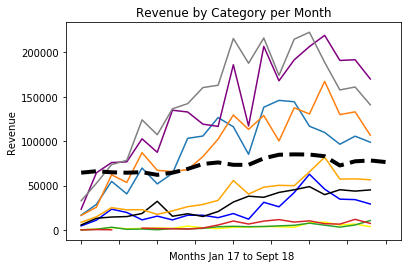

In [180]:
appliances_line = newgroup.iloc[0]
appliances_line.plot(kind='line', color='blue')

auto_line = newgroup.iloc[1]
auto_line.plot(kind='line', color ='black')

books_line = newgroup.iloc[2]
books_line.plot(kind='line', color='yellow')

construction_tools_line = newgroup.iloc[3]
construction_tools_line.plot(kind='line', color='orange')

electronics_line = newgroup.iloc[7]
electronics_line.plot(kind='line')

fashion_clothing_line = newgroup.iloc[8]
fashion_clothing_line.plot(kind='line')

food_drink_line = newgroup.iloc[11]
food_drink_line.plot(kind='line')

home_furniture_line = newgroup.iloc[14]
home_furniture_line.plot(kind='line', color ='purple')

industry_line = newgroup.iloc[15]
industry_line.plot(kind='line')

other_line = newgroup.iloc[16]
other_line.plot(kind='line', color ='gray')

Bov_line = newgroup2
Bov_line.plot(kind='line', color='black', linewidth=4,linestyle='--')



plt.title('Revenue by Category per Month')
plt.ylabel('Revenue')
plt.savefig('./Graphs/CategoricalLineGraph.png')

plt.show()

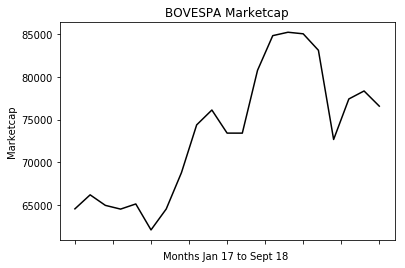

In [172]:
Bov_line = newgroup2
Bov_line.plot(kind='line', color='black')

plt.title('BOVESPA Marketcap')
plt.ylabel('Marketcap')
plt.savefig('./Graphs/BOVESPA_marketcap.png')

plt.show()